In [63]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

from preprocessing import read_eeg_data, convert_to_image
from mhd_implementations import (
    margenau_hill_distribution_spectrogram_tfrmhs,
    margenau_hill_distribution,
    pseudo_margenau_hill_distribution,
)

In [64]:
def margenau_hill_preparation(mhd: np.ndarray, ts: np.ndarray) -> Tuple[np.ndarray, Tuple[float, float, float, float]]:
    """
    Prepares the Margenau-Hill distribution for plotting by removing mirrored frequencies,
    cleaning up small or negative values, and setting up the time and frequency ranges.

    :param mhd: 2D array representing the Margenau-Hill distribution.
    :param ts: 1D array representing the time stamps corresponding to the distribution.
    :return: Tuple containing the cleaned-up Margenau-Hill distribution and the extent of the time-frequency plot.
    """
    # Remove mirrored frequencies.
    mhd = mhd[:(mhd.shape[0] // 2), :]
    # Clean up signal a little from too small and negative values.
    threshold = 0.05
    _threshold = np.amax(mhd) * threshold
    mhd[mhd <= _threshold] = 0.0
    # Get time and frequency ranges.
    extent = (0, ts.max(), 0, 0.5)
    return mhd, extent

In [65]:
def use_mhd(signal: np.ndarray, margenau_hill_distribution) -> Tuple[np.ndarray, Tuple[float, float, float, float]]:
    """
    Computes the Margenau-Hill distribution using a specified method and prepares it for plotting.

    :param signal: 1D array representing the EEG signal.
    :param margenau_hill_distribution: Function to compute the Margenau-Hill distribution.
    :return: Tuple containing the Margenau-Hill distribution and the extent of the time-frequency plot.
    """
    tfr, ts = margenau_hill_distribution(signal)
    return margenau_hill_preparation(tfr, ts)

In [66]:
def mhd_plot(mhd: np.ndarray, extent: Tuple[float, float, float, float]) -> None:
    """
    Plots the Margenau-Hill distribution using matplotlib.

    :param mhd: 2D array representing the Margenau-Hill distribution.
    :param extent: Tuple defining the extent of the axes (x_min, x_max, y_min, y_max).
    :return: None
    """
    plt.imshow(mhd, aspect='auto', cmap='viridis', origin='lower', extent=extent)
    plt.show()

In [67]:
# Constants
SIGNAL_LEN = 7680
NUM_CHANNELS = 16
SAMPLING_RATE = 128
window_sec = 3

# Load signal
file_path = 'data/088w1.eea'
eeg_data = np.array(read_eeg_data(file_path))

# Resample or shorten the signal if needed
shortened_signal_len = SAMPLING_RATE * window_sec
shortened_signal = eeg_data[0, :shortened_signal_len]

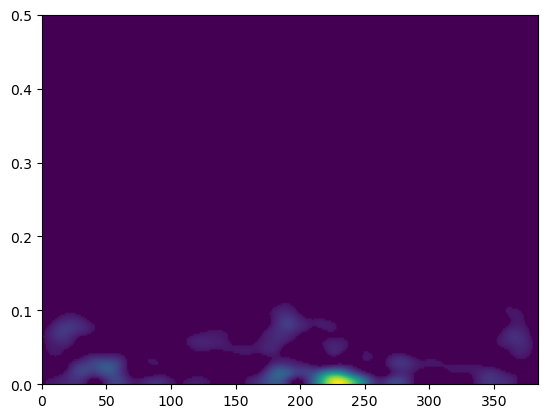

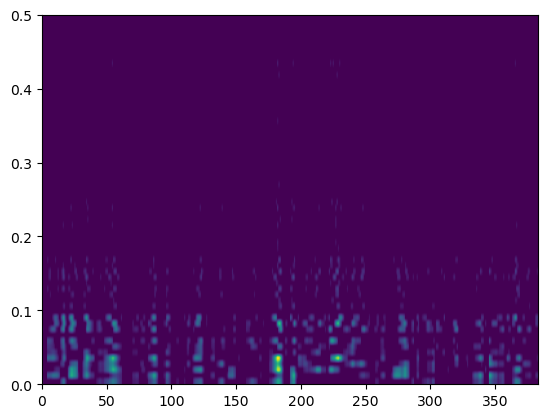

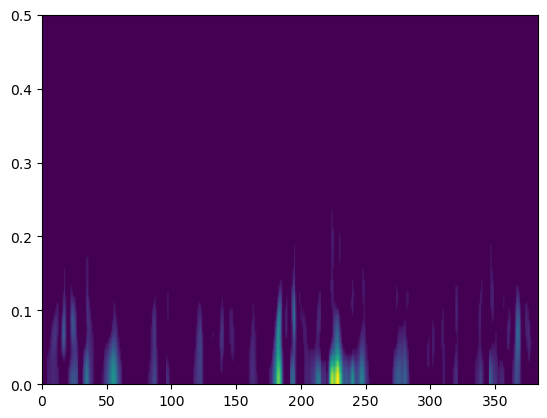

In [68]:
# Plot MHD using different methods
mhd_tfrmhs, extent_tfrmhs = use_mhd(shortened_signal, margenau_hill_distribution_spectrogram_tfrmhs)
mhd_plot(mhd_tfrmhs, extent_tfrmhs)

mhd_tftb, extent_tftb = use_mhd(shortened_signal, margenau_hill_distribution)
mhd_plot(mhd_tftb, extent_tftb)

pmhd_tftb, p_extent_tftb = use_mhd(shortened_signal, pseudo_margenau_hill_distribution)
mhd_plot(pmhd_tftb, p_extent_tftb)

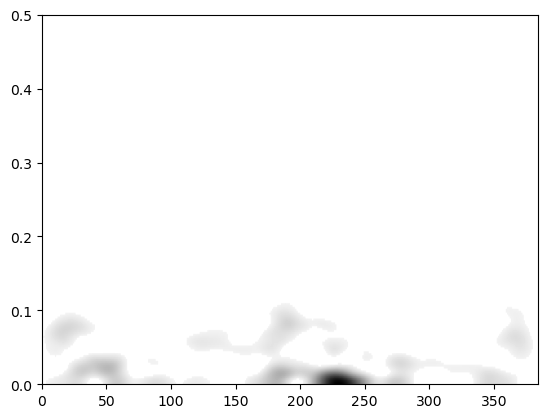

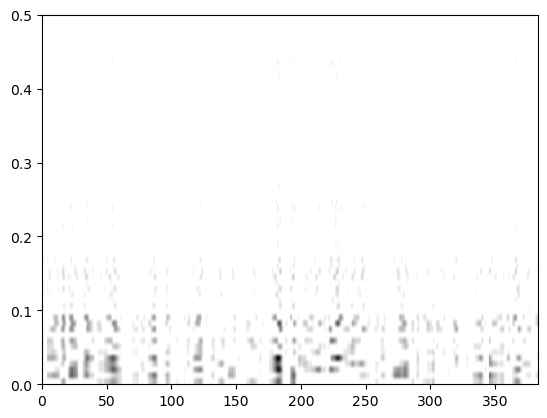

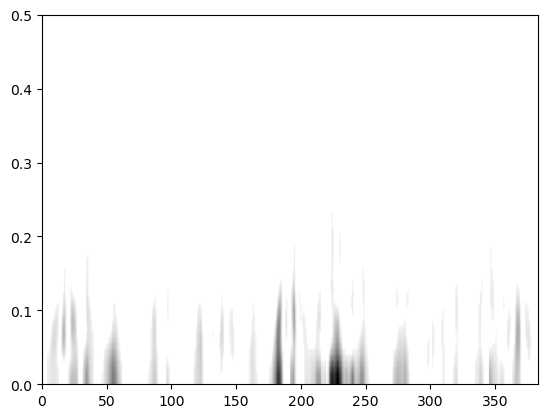

In [69]:
# Convert MHD to image
mhd_tfrmhs_image = convert_to_image(mhd_tfrmhs, flip=True)
plt.imshow(mhd_tfrmhs_image, aspect='auto', cmap='gray', extent=extent_tfrmhs)
plt.show()

mhd_tftb_image = convert_to_image(mhd_tftb, flip=True)
plt.imshow(mhd_tftb_image, aspect='auto', cmap='gray', extent=extent_tftb)
plt.show()

pmhd_tftb_image = convert_to_image(pmhd_tftb, flip=True)
plt.imshow(pmhd_tftb_image, aspect='auto', cmap='gray', extent=p_extent_tftb)
plt.show()

In [70]:
# Save the final image
im = Image.fromarray(mhd_tfrmhs_image)
im.save("mhd.png")